# Перцептрон для восприятия цифр
__Суммарное количество баллов: 10__

В этом задании вам предстоит реализовать классический перцептрон, немного улчшить его, и протестировать результат на классической задаче определния цифр по изображениям.

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
def visualize(X, labels_true, labels_pred, w):
    unique_labels = np.unique(labels_true)
    unique_colors = dict([(l, c) for l, c in zip(unique_labels, [[0.8, 0., 0.], [0., 0., 0.8]])])
    plt.figure(figsize=(9, 9))

    if w[1] == 0:
        plt.plot([X[:, 0].min(), X[:, 0].max()], w[0] / w[2])
    elif w[2] == 0:
        plt.plot(w[0] / w[1], [X[:, 1].min(), X[:, 1].max()])  
    else:
        mins, maxs = X.min(axis=0), X.max(axis=0)
        pts = [[mins[0], -mins[0] * w[1] / w[2] - w[0] / w[2]],
               [maxs[0], -maxs[0] * w[1] / w[2] - w[0] / w[2]],
               [-mins[1] * w[2] / w[1] - w[0] / w[1], mins[1]],
               [-maxs[1] * w[2] / w[1] - w[0] / w[1], maxs[1]]]
        pts = [(x, y) for x, y in pts if mins[0] <= x <= maxs[0] and mins[1] <= y <= maxs[1]]
        if len(pts) > 1:
            x, y = list(zip(*pts))
            plt.plot(x, y, c=(0.75, 0.75, 0.75), linestyle="--")
    
    colors_inner = [unique_colors[l] for l in labels_true]
    colors_outer = [unique_colors[l] for l in labels_pred]
    plt.scatter(X[:, 0], X[:, 1], c=colors_inner, edgecolors=colors_outer)
    plt.show()

### Задание 1 (3 балла)
Для начала реализуем простой перцептрон.

#### Методы
`predict(X)` - возвращает предсказанные метки для элементов выборки `X`

`fit(X, y)` - инициализирует веса перцептрона нулями, а затем обновляет их в течении `iterations` итераций. Обновление происходит следующим образом: $w_{t+1} = w_t + \sum_{y_i: \text{sign}(x_i w) \neq y_i} y_i \cdot x_i$.

Гарантируется, что в обучающей и тестовой выборках всего два класса. Обратите внимание, что метки классов в обучающей выборке могут быть любыми.

#### Параметры конструктора
`iterations` - количество итераций обучения перцептрона

#### Поля
`w` - веса перцептрона размерности `X.shape[1] + 1`. `w[0]` должен соответстовать константе, `w[1:]` - коэффициентам компонент элемента `X`.

#### Тесты
Есть две группы тестов:
1. Линейно разделимые данные с равным количеством точек в каждом классе. Всего 20 тестов по 150 точек в train и 50 точек в test.
2. Линейно разделимые данные с неравным еоличеством точек в каждом классе. Всего 20 тестов по 150 точек в train и 50 точек в test.

Количество итераций на каждом из тестов равно `20000`, а размерность пространства не превышает `16`.

In [ ]:
def add_one_left(X):
    return np.concatenate(([1], X))

class Perceptron:
    def __init__(self, iterations: int = 100):
        """
        Parameters
        ----------
        iterations : int
        Количество итераций обучения перцептрона.

        Attributes
        ----------
        w : np.ndarray
        Веса перцептрона размерности X.shape[1] + 1 (X --- данные для обучения), 
        w[0] должен соответстовать константе, 
        w[1:] - коэффициентам компонент элемента X.

        Notes
        -----
        Вы можете добавлять свои поля в класс.
        
        """
        self.iterations = iterations
        self.w = None
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        X = np.apply_along_axis(add_one_left, 1, X)
        self.unique_labels = np.unique(y)
        signs = np.array([-1 if p == self.unique_labels[0] else 1 for p in y])
        w = np.zeros(X.shape[1])
        
        biases = X * signs[:, np.newaxis]
        for i in range(self.iterations):
          h = np.sign(np.dot(X, w))
          tfs = np.array(signs != h)
          w +=  np.sum(biases[tfs], axis=0)
        self.w = w
            
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Предсказывает метки классов.
        
        Parameters
        ----------
        X : np.ndarray
            Набор данных, для которого необходимо вернуть метки классов.
        
        Return
        ------
        labels : np.ndarray
            Вектор индексов классов 
            (по одной метке для каждого элемента из X).
        
        """
        if (X.shape[1] < self.w.shape[0]):
            X = np.apply_along_axis(add_one_left, 1, X)
        prod = np.array(np.dot(X, self.w))
        return np.array([self.unique_labels[0] if p <= 0 else self.unique_labels[1] for p in prod])

In [ ]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = Perceptron()
c.fit(X, true_labels)
a = np.array(c.predict(X))

print(true_labels)
print(a)



[1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1
 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1
 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0
 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1
 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1
 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1
 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1]
[1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1
 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0

Посмотрим на то, как наш перцептрон справляется с различными наборами данных

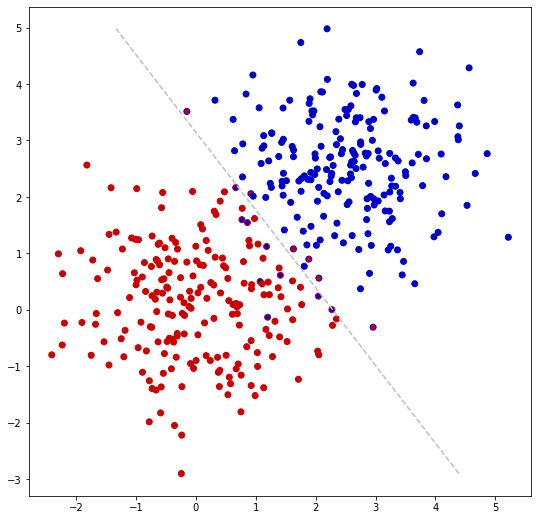

In [ ]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = Perceptron()
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

In [ ]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])


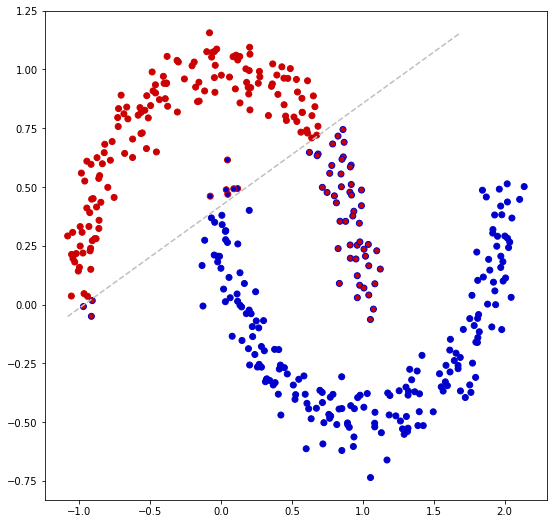

In [ ]:
X, true_labels = make_moons(400, noise=0.075)
c = Perceptron()
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

### Задание 2 (2 балла)
Проблема обычной реализации перцептрона в том, что закончить его обучение мы можем с неоптимальными весами, т.к. точность разбиения в зависимости от числа итераций не растет монотонно. Чтобы этого избежать, мы можем оставлять в конце веса той итерации, на которой мы лучше всего разбивали множество `X`.

#### Методы
`predict(X)` - возвращает предсказанные метки для элементов выборки `X`

`fit(X, y)` -  - инициализирует веса перцептрона нулями, а затем обновляет их в течении `iterations` итераций. Обновление происходит следующим образом: $w_{t+1} = w_t + \sum_{y_i: \text{sign}(x_i w) \neq y_i} y_i \cdot x_i$. В конце обучения оставляет веса, которые классифицируют train выборку лучше всего. Обратите внимание: для сохранения лучших весов следует использовать `np.copy`

Гарантируется, что в обучающей и тестовой выборках всего два класса. Обратите внимание, что метки классов в обучающей выборке могут быть любыми.

#### Параметры конструктора
`iterations` - количество итераций обучения перцептрона

#### Поля
`w` - веса перцептрона размерности `X.shape[1] + 1`. `w[0]` должен соответстовать константе, `w[1:]` - коэффициентам компонент элемента `X`.

#### Тесты
Есть две группы тестов:
1. Линейно разделимые данные с неравным еоличеством точек в каждом классе. Всего 20 тестов по 200 точек в train и 100 точек в test.
2. Линейно неразделимые данные с outlier'ами. Всего 20 тестов по 400 точек в train и 100 точек в test.

Количество итераций на каждом из тестов равно `20000`, а размерность пространства не превышает `16`.

In [ ]:
class PerceptronBest:
    def __init__(self, iterations: int = 100):
        """
        biases = X * signs[:, np.newaxis]
        Parameters
        ----------
        iterations : int
        Количество итераций обучения перцептрона.

        Attributes
        ----------
        w : np.ndarray
        Веса перцептрона размерности X.shape[1] + 1 (X --- данные для обучения), 
        w[0] должен соответстовать константе, 
        w[1:] - коэффициентам компонент элемента X.

        Notes
        -----
        Вы можете добавлять свои поля в класс.
        """
        self.w = None
        self.iterations = iterations
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        X = np.apply_along_axis(add_one_left, 1, X)
        self.unique_labels = np.unique(y)
        signs = np.array([-1 if p == self.unique_labels[0] else 1 for p in y])
        self.w = np.zeros(X.shape[1])
        
        biases = X * signs[:, np.newaxis]
        current_w = np.zeros(X.shape[1])
        best_matches = 0
        for i in range(self.iterations):
          h = np.sign(np.dot(X, current_w))
          tfs = np.array(signs != h)
          matches = len(X) - np.sum(tfs)
          if best_matches < matches:
            best_matches = matches
            self.w = np.copy(current_w)
          #if matches == len(X):
          #  return
          current_w +=  np.sum(biases[tfs], axis=0)


    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Предсказывает метки классов.
        
        Parameters
        ----------
        X : np.ndarray
            Набор данных, для которого необходимо вернуть метки классов.
        
        Return
        ------
        labels : np.ndarray
            Вектор индексов классов 
            (по одной метке для каждого элемента из X).
        
        """
        if (X.shape[1] < self.w.shape[0]):
            X = np.apply_along_axis(add_one_left, 1, X)
        prod = np.array(np.dot(X, self.w))
        return np.array([self.unique_labels[0] if p <= 0 else self.unique_labels[1] for p in prod])

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [2. 1.]
 [2. 2.]
 [1. 4.]] [1 1 1 0 0 0] [1 1 1 0 0 0] [ 36. -17.  -5.]


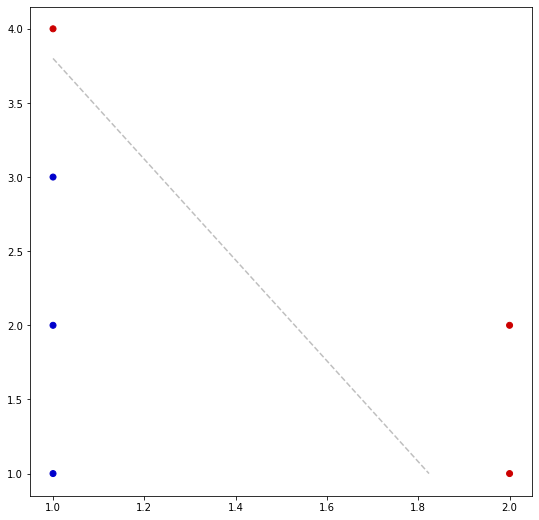

In [ ]:
X1, true_labels1 = np.array([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0], [2.0, 1.0], [2.0, 2.0], [1.0, 4.0]]), np.array([1, 1, 1, 0, 0, 0]) 
c1 = PerceptronBest(iterations=150)
c1.fit(X1, true_labels1)
pred = np.array(c1.predict(X1))

print(X1, true_labels1, pred, c1.w)
visualize(X1, true_labels1, pred, c1.w)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [2. 1.]
 [2. 2.]
 [1. 4.]] [1 1 0 0 0 0] [1 1 0 0 0 0] [15. -6. -4.]


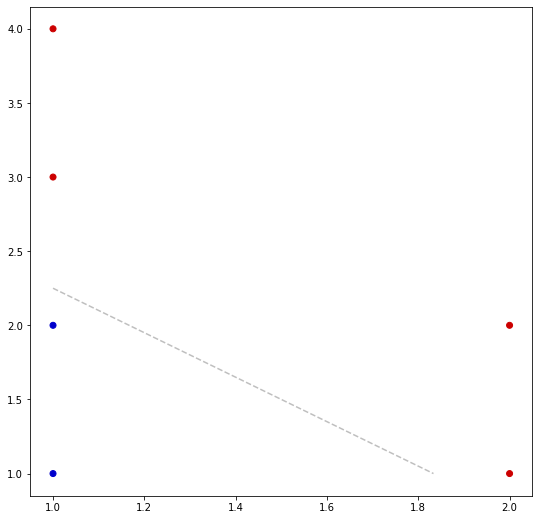

In [ ]:
X2, true_labels2 = np.array([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0], [2.0, 1.0], [2.0, 2.0], [1.0, 4.0]]), np.array([1, 1, 0, 0, 0, 0]) 
c2 = PerceptronBest(iterations=100)
c2.fit(X2, true_labels2)
pred = np.array(c2.predict(X2))

print(X2, true_labels2, pred, c2.w)
visualize(X2, true_labels2, pred, c2.w)

Посмотрим на то, как наш перцептрон справляется с различными наборами данных

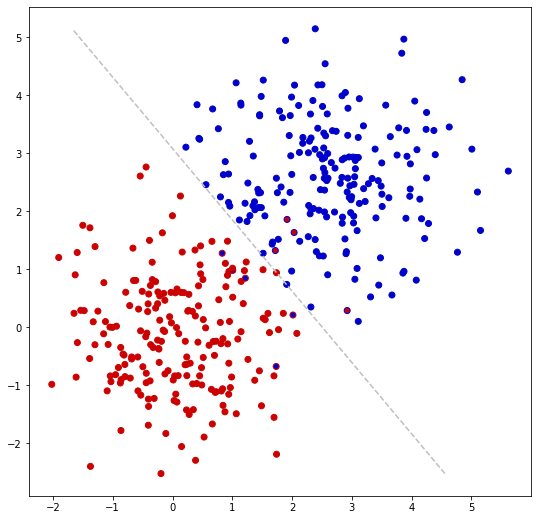

In [ ]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = PerceptronBest()
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

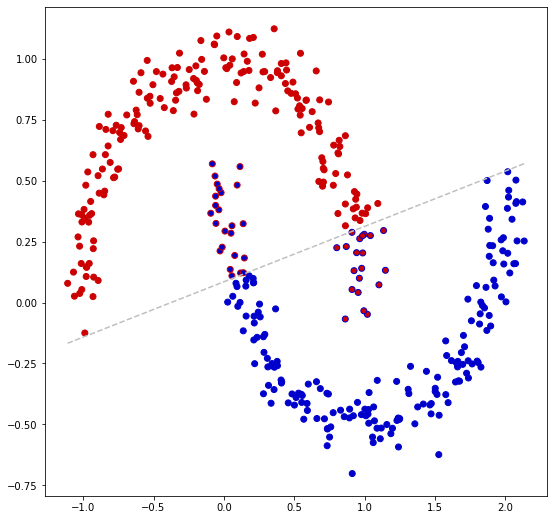

In [ ]:
X, true_labels = make_moons(400, noise=0.075)
c = PerceptronBest()
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

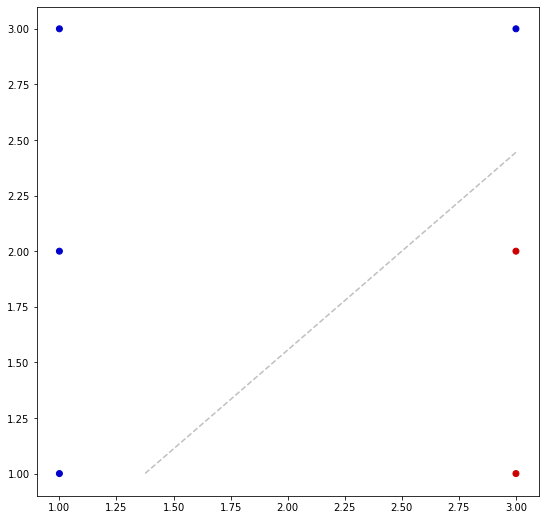

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [3. 1.]
 [3. 2.]
 [3. 3.]] [1 1 1 0 0 1] [1 1 1 0 0 1] [ 2. -8.  9.]


In [ ]:
X, true_labels = np.array([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0], [3.0, 1.0], [3.0, 2.0], [3.0, 3.0]]), np.array([1, 1, 1, 0, 0, 1]) 
c = PerceptronBest()
c.fit(X, true_labels)
pred =  np.array(c.predict(X))
visualize(X, true_labels, pred, c.w)
print(X, true_labels, pred, c.w)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [2. 1.]
 [2. 2.]
 [1. 4.]] [1 1 1 0 0 0] [1 1 1 0 0 1] [ 9. -8.  2.]


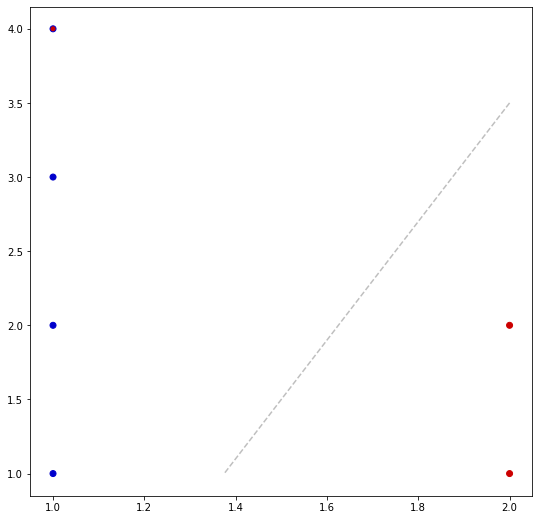

In [ ]:
X2, true_labels2 = np.array([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0], [2.0, 1.0], [2.0, 2.0], [1.0, 4.0]]), np.array([1, 1, 1, 0, 0, 0]) 
c2 = PerceptronBest()
c2.fit(X2, true_labels2)
pred = np.array(c2.predict(X2))

print(X2, true_labels2, pred, c2.w)
visualize(X2, true_labels2, pred, c2.w)

### Задание 3 (1 балл)
Реализуйте метод `transform_images(images)`, который преобразует изображения в двумерные векторы. Значение компонент векторов придумайте сами и напишите в виде комментария к методу.

In [ ]:
def x_symmetry(image): 
    symmetry = 0
    xs = image.shape[0]
    for i in range(image.shape[1]):
        for j in range(xs):
            cur_val = abs((image[j][i] - image[xs - 1 - j][i]))
            if 0.1 < cur_val:
              symmetry += cur_val ** 2
    return symmetry

def y_symmetry(image): 
    symmetry = 0
    ys = image.shape[1]
    for i in range(image.shape[0]):
        for j in range(ys):
            cur_val = abs(image[i][j] - image[i][ys - 1 - j])
            if 0.1 < cur_val:
              symmetry += cur_val ** 2
    return symmetry

def disp(image):
    counts = image.shape[0] * image.shape[1]
    res = 0.0
    me = np.sum(image) / counts
    for i in range(len(image)):
      for j in range(image.shape[1]):
        res += (image[i][j] - me) ** 2 
    return np.sqrt(res)



def transform_images(images):
    transform_result = []
    for image in images:
        inks = image.sum()
        x_sym = x_symmetry(image)
        y_sym = y_symmetry(image)
        upper_incs = np.sum(image[:int(len(image) / 2)])
        area = 0.
        for i in range(len(image)):
          for j in range(image.shape[1]):
            if (0.1 < image[i][j]):
              area += 1
        dis = disp(image)
        inksPlus = np.average(image[:2])
        transform_result.append([x_sym, y_sym])
    return np.array(transform_result)


def get_digits(y0=1, y1=5):
    data = datasets.load_digits()
    images, labels = data.images, data.target
    mask = np.logical_or(labels == y0, labels == y1)
    labels = labels[mask]
    images = images[mask]
    images /= np.max(images)
    X = transform_images(images)
    return X, labels

### Задание 4 (4 балла)
Теперь посмотрим на точность обычного перцептрона и перцептрона выбором лучшей итерации. Для тестирования будем использовать цифры 1 и 5. Необходимо использовать реализованное выше преобразование, т.е. только векторы из 2х признаков. 

Оценка за это задание выставляется следующим образом:
1. 1 балл - что-то обучается, картинки рисуются
2. 2 балла - точность хотя бы одного из классификаторов на тестовой выборке больше 80%
3. 4 балла - точность хотя бы одного из классификаторов на тестовой выборке больше 90%

__Обратите внимание, что перцептрон детерминирован, а выборка должна разбиваться без перемешивания__

In [ ]:
X, y = get_digits()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

[1 5 1 5 1 5 5 5 5 1 5 1 1 1 5 5 5 1 1 1 1 5 1 5 5 5 1 5 1 5 1 5 5 5 5 1 5
 1 1 1 5 5 1 1 1 1 1 5 1 5 5 5 5 5 1 5 1 5 5 5 5 1 5 5 1 1 5 5 5 1 5 1 1 5
 1 5 5 5 1 5 1 5 1 5 5 5 5 1 5 1 5 1 5 5 5 1 1 1 5 5 1 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 1 5 1 5 5 5 5 5 5 5 1 1 5 5 1 5
 1 1 5 5 5 5 5 5 1 5 1 5 1 5 5 5 5 1 5 1 5 1 5 5 1 5 1 1 1 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 1 5 1 5 5 5 5 5 5 1 1 1
 5 5 1 1 5 1 1 5 1 5 5 5 5 5 1 5 5 5 5 5 5 1 5 5 1 1 5 5 1 5 1 1 1 5 1 5 5
 5 5 5 5 5 1 5 5 5 5 1 5 1 1 1 5 5 5 1 1 1 1 5 1 5 5 5 1 5 1 5 1] [-3536.         1895.5546875  -641.3671875]


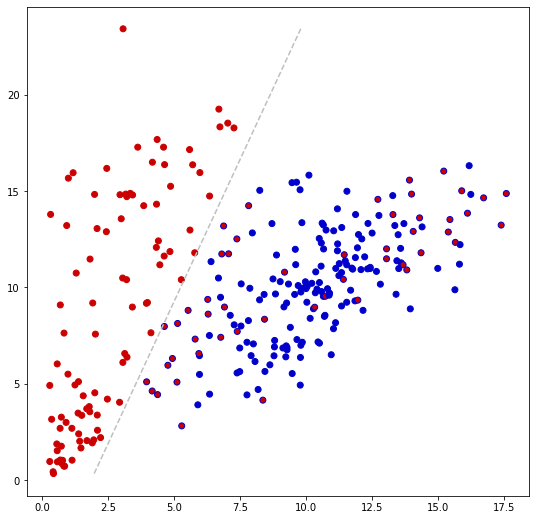

Accuracy: 0.958904109589041


In [ ]:
c = Perceptron(iterations=100000)
c.fit(X_train, y_train)
print(c.predict(X_train), c.w)
visualize(X_train, y_train, np.array(c.predict(X_train)), c.w)
print("Accuracy:", np.mean(c.predict(X_test) == y_test))

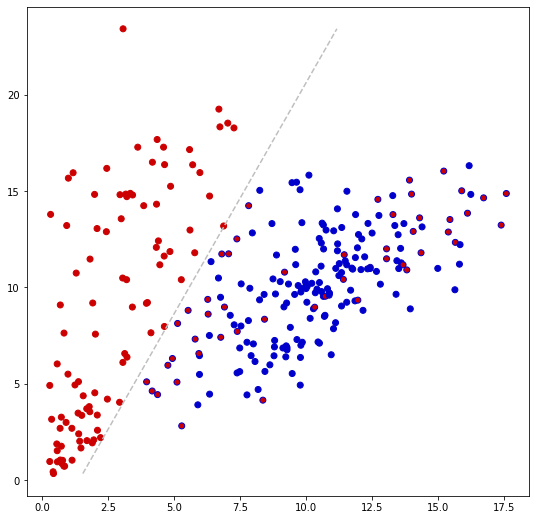

Accuracy: 0.9452054794520548


In [ ]:
c = PerceptronBest(iterations=100000)
c.fit(X_train, y_train)
visualize(X_train, y_train, np.array(c.predict(X_train)), c.w)
print("Accuracy:", np.mean(c.predict(X_test) == y_test))

А теперь посчитаем среднюю точность по всем возможным парам цифр

In [ ]:
accs = []
for y0, y1 in [(y0, y1) for y0 in range(9) for y1 in range(y0+1, 10)]:
    X, y = get_digits(y0, y1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
    c = Perceptron(iterations=20000)  
    c.fit(X_train, y_train)
    accs.append(np.mean(c.predict(X_test) == y_test))
print("Mean accuracy:", np.mean(accs))

Mean accuracy: 0.6917677807075839


In [ ]:
accs = []
for y0, y1 in [(y0, y1) for y0 in range(9) for y1 in range(y0+1, 10)]:
    X, y = get_digits(y0, y1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
    c = PerceptronBest(iterations=20000)
    c.fit(X_train, y_train)
    accs.append(np.mean(c.predict(X_test) == y_test))
print("Mean accuracy:", np.mean(accs))

Mean accuracy: 0.7497745478451634
